## IMDB Sentiment Analysis 

## Import Libraries 

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import string
import os
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratery data analysis

In [ ]:
# Load IMDB Dataset
df = pd.read_csv('IMDB Dataset.csv')
print(df.shape)
print("\n Distribution of sentiment labels:")
print(df['sentiment'].value_counts())
df['review_length'] = df['review'].apply(len)
print("\nSample of review lengths:")
print(df['review_length'].describe())


(50000, 2)

 Distribution of sentiment labels:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Sample of review lengths:
count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64


In [64]:
df.head(20)

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
5,"Probably my all-time favorite movie, a story o...",positive,656
6,I sure would like to see a resurrection of a u...,positive,726
7,"This show was an amazing, fresh & innovative i...",negative,934
8,Encouraged by the positive comments about this...,negative,681
9,If you like original gut wrenching laughter yo...,positive,176


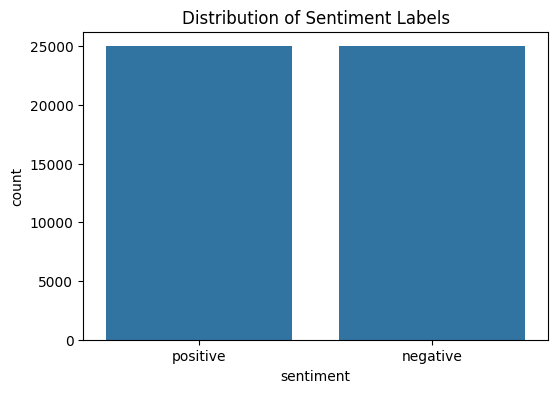

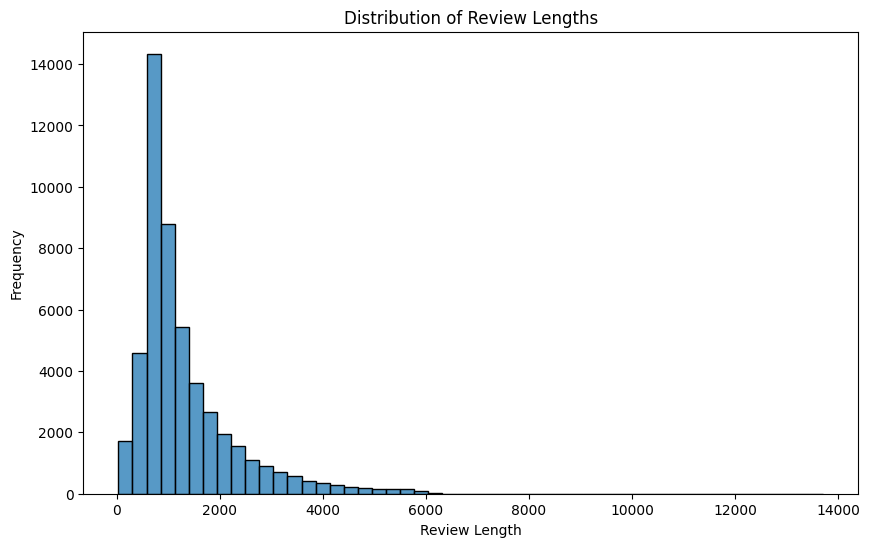

In [66]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()



## Tranditional Method:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import time
import pickle

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt', download_dir='./nltk_data')
nltk.download('stopwords', download_dir='./nltk_data')
nltk.download('wordnet', download_dir='./nltk_data')
nltk.data.path.append('./nltk_data')
nltk.download('punkt_tab')

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.tokenize import WordPunctTokenizer, TreebankWordTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/phuthienquach/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phuthienquach/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/phuthienquach/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to ./nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to ./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to ./nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/phuthienquach/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [69]:
def preprocess_text(text, stemming=True, lemmatization=False, remove_stopwords=True):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

    if stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]

    if lemmatization:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)


processed_reviews = []
for i, review in enumerate(df['review']):
    if i % 1000 == 0:
        print(f"Đang xử lý review {i}/{len(df)}...")
    processed = preprocess_text(review, stemming=True, lemmatization=False, remove_stopwords=True)
    processed_reviews.append(processed)

df['processed_text'] = processed_reviews

Đang xử lý review 0/50000...
Đang xử lý review 1000/50000...
Đang xử lý review 2000/50000...
Đang xử lý review 3000/50000...
Đang xử lý review 4000/50000...
Đang xử lý review 5000/50000...
Đang xử lý review 6000/50000...
Đang xử lý review 7000/50000...
Đang xử lý review 8000/50000...
Đang xử lý review 9000/50000...
Đang xử lý review 10000/50000...
Đang xử lý review 11000/50000...
Đang xử lý review 12000/50000...
Đang xử lý review 13000/50000...
Đang xử lý review 14000/50000...
Đang xử lý review 15000/50000...
Đang xử lý review 16000/50000...
Đang xử lý review 17000/50000...
Đang xử lý review 18000/50000...
Đang xử lý review 19000/50000...
Đang xử lý review 20000/50000...
Đang xử lý review 21000/50000...
Đang xử lý review 22000/50000...
Đang xử lý review 23000/50000...
Đang xử lý review 24000/50000...
Đang xử lý review 25000/50000...
Đang xử lý review 26000/50000...
Đang xử lý review 27000/50000...
Đang xử lý review 28000/50000...
Đang xử lý review 29000/50000...
Đang xử lý review 30000

In [18]:
df.to_csv('processed_reviews.csv', index=False, encoding='utf-8')


In [11]:
# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], df['sentiment'], test_size=0.2, random_state=42
)

print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# 1. TF-IDF Vectorization
print("\nBắt đầu chuyển đổi TF-IDF...")
start_time = time.time()

# Sử dụng kết hợp unigrams và bigrams
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,  # Giới hạn số lượng features
    min_df=5,            # Bỏ qua các từ xuất hiện trong ít hơn 5 documents
    max_df=0.8,          # Bỏ qua các từ xuất hiện trong hơn 80% documents
    ngram_range=(1, 2)   # Sử dụng cả unigrams và bigrams
)

# Học từ tập train và chuyển đổi
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

end_time = time.time()
print(f"Chuyển đổi TF-IDF hoàn tất trong {end_time - start_time:.2f} giây")
print(f"Shape của X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape của X_test_tfidf: {X_test_tfidf.shape}")

# 2. Bag of Words Vectorization (tùy chọn)
print("\nBắt đầu chuyển đổi Bag of Words...")
start_time = time.time()

count_vectorizer = CountVectorizer(
    max_features=10000,
    min_df=5,
    max_df=0.8,
    ngram_range=(1, 2)
)

X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

end_time = time.time()
print(f"Chuyển đổi Bag of Words hoàn tất trong {end_time - start_time:.2f} giây")
print(f"Shape của X_train_bow: {X_train_bow.shape}")
print(f"Shape của X_test_bow: {X_test_bow.shape}")

Train set size: 40000
Test set size: 10000

Bắt đầu chuyển đổi TF-IDF...
Chuyển đổi TF-IDF hoàn tất trong 11.74 giây
Shape của X_train_tfidf: (40000, 10000)
Shape của X_test_tfidf: (10000, 10000)

Bắt đầu chuyển đổi Bag of Words...
Chuyển đổi Bag of Words hoàn tất trong 11.27 giây
Shape của X_train_bow: (40000, 10000)
Shape của X_test_bow: (10000, 10000)


In [17]:
df.head(20)

,review,sentiment,review_length,processed_text
0,One of the other reviewers has mentioned that ...,positive,1761,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,positive,998,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,748,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter mattei love time money visual stun film...
5,"Probably my all-time favorite movie, a story o...",positive,656,probabl alltim favorit movi stori selfless sac...
6,I sure would like to see a resurrection of a u...,positive,726,sure would like see resurrect date seahunt ser...
7,"This show was an amazing, fresh & innovative i...",negative,934,show amaz fresh innov idea first air first yea...
8,Encouraged by the positive comments about this...,negative,681,encourag posit comment film look forward watch...
9,If you like original gut wrenching laughter yo...,positive,176,like origin gut wrench laughter like movi youn...



Huấn luyện Logistic Regression với TF-IDF...
Huấn luyện hoàn tất trong 0.41 giây

--- Kết quả đánh giá cho Logistic Regression with TF-IDF ---
Accuracy: 0.8908

Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



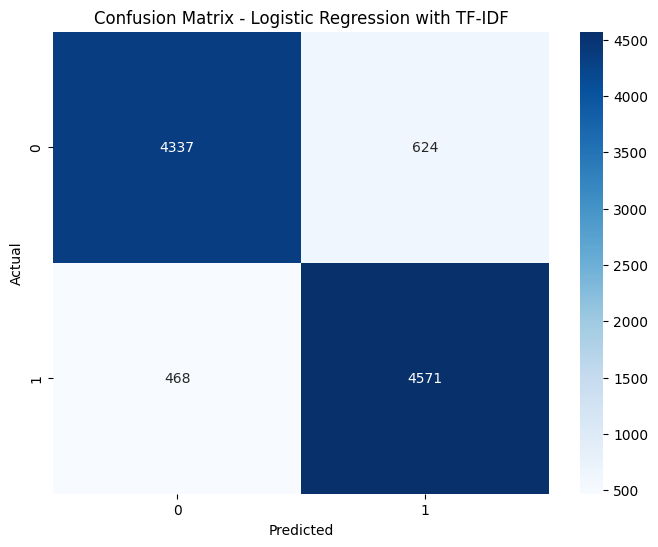


Huấn luyện SVM với TF-IDF...
Huấn luyện hoàn tất trong 0.66 giây

--- Kết quả đánh giá cho SVM with TF-IDF ---
Accuracy: 0.8865

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.88      0.88      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



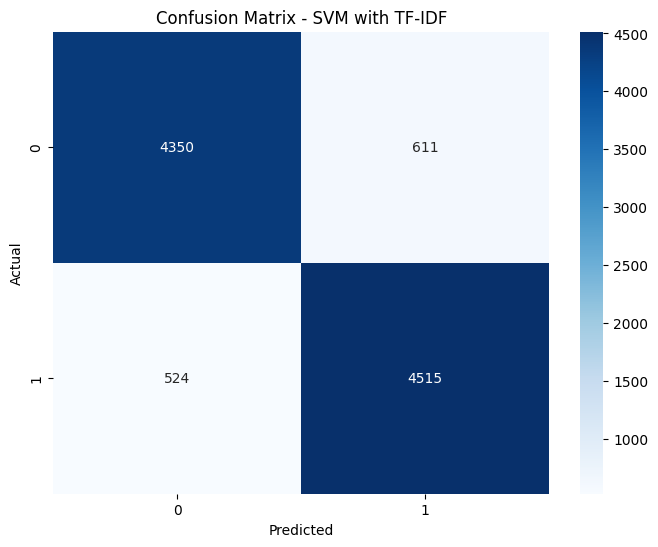


Huấn luyện Random Forest với TF-IDF...
Huấn luyện hoàn tất trong 5.81 giây

--- Kết quả đánh giá cho Random Forest with TF-IDF ---
Accuracy: 0.8560

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.86      0.86      4961
    positive       0.86      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



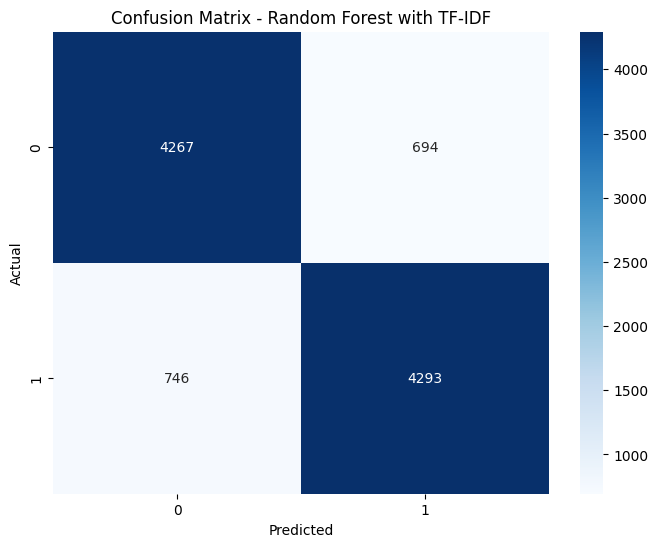


Huấn luyện XGBoost với TF-IDF...
Chuyển đổi nhãn từ chuỗi sang số...
Huấn luyện hoàn tất trong 19.81 giây

--- Kết quả đánh giá cho XGBoost with TF-IDF ---
Accuracy: 0.8338

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      4961
           1       0.82      0.86      0.84      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



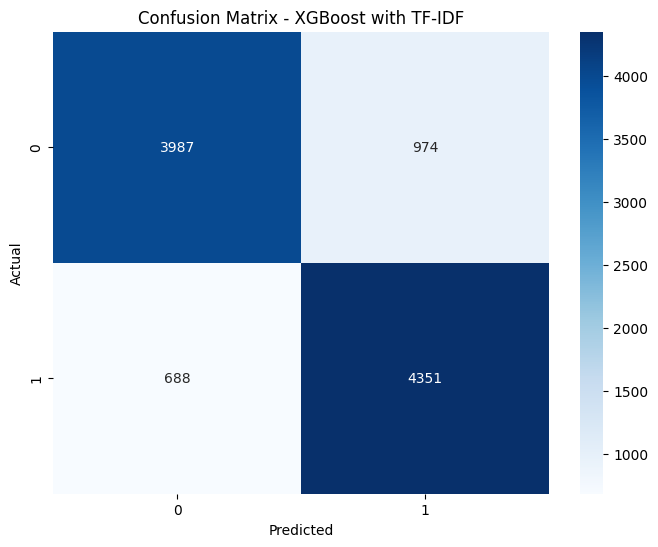

In [12]:
# Hàm để đánh giá và in ra các metrics
def evaluate_model(model, X_test, y_test, model_name):
    # Dự đoán
    y_pred = model.predict(X_test)
    
    # Tính accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # In report
    print(f"\n--- Kết quả đánh giá cho {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Vẽ confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Trả về accuracy để so sánh các mô hình
    return accuracy

# 1. Logistic Regression với TF-IDF
print("\nHuấn luyện Logistic Regression với TF-IDF...")
start_time = time.time()

lr_model = LogisticRegression(
    C=1.0,               # Hệ số regularization
    class_weight='balanced',  # Xử lý mất cân bằng lớp
    max_iter=1000,       # Số lần lặp tối đa
    solver='liblinear',  # Thuật toán tối ưu
    random_state=42
)

lr_model.fit(X_train_tfidf, y_train)
end_time = time.time()
print(f"Huấn luyện hoàn tất trong {end_time - start_time:.2f} giây")

# Đánh giá
lr_accuracy = evaluate_model(lr_model, X_test_tfidf, y_test, "Logistic Regression with TF-IDF")

# 2. SVM với TF-IDF
print("\nHuấn luyện SVM với TF-IDF...")
start_time = time.time()

svm_model = LinearSVC(
    C=1.0,
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

svm_model.fit(X_train_tfidf, y_train)
end_time = time.time()
print(f"Huấn luyện hoàn tất trong {end_time - start_time:.2f} giây")

# Đánh giá
svm_accuracy = evaluate_model(svm_model, X_test_tfidf, y_test, "SVM with TF-IDF")

# 3. Random Forest với TF-IDF
print("\nHuấn luyện Random Forest với TF-IDF...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1  # Sử dụng tất cả CPU cores
)

rf_model.fit(X_train_tfidf, y_train)
end_time = time.time()
print(f"Huấn luyện hoàn tất trong {end_time - start_time:.2f} giây")

# Đánh giá
rf_accuracy = evaluate_model(rf_model, X_test_tfidf, y_test, "Random Forest with TF-IDF")

# 4. XGBoost với TF-IDF
print("\nHuấn luyện XGBoost với TF-IDF...")
start_time = time.time()

# Đảm bảo y_train và y_test là số (0, 1) chứ không phải chuỗi
if y_train.dtype == object:
    print("Chuyển đổi nhãn từ chuỗi sang số...")
    y_train = y_train.map({'positive': 1, 'negative': 0})
    y_test = y_test.map({'positive': 1, 'negative': 0})

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_tfidf, y_train)
end_time = time.time()
print(f"Huấn luyện hoàn tất trong {end_time - start_time:.2f} giây")

# Đánh giá
xgb_accuracy = evaluate_model(xgb_model, X_test_tfidf, y_test, "XGBoost with TF-IDF")

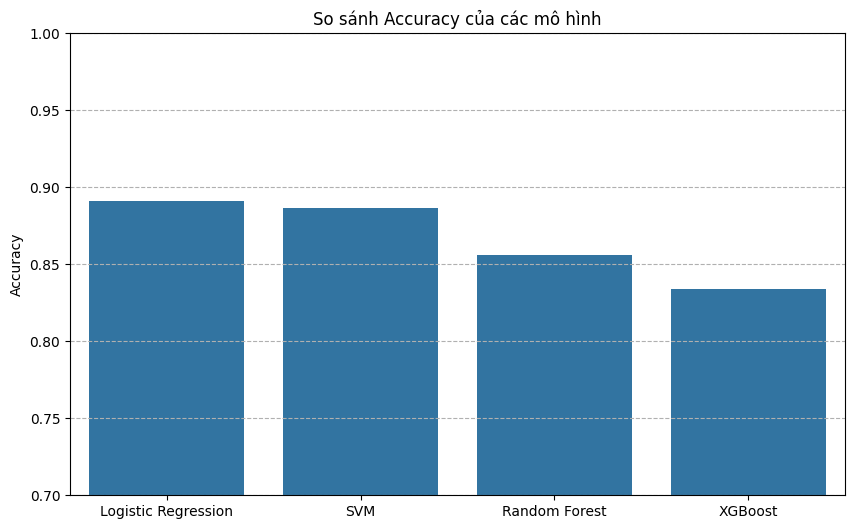


Mô hình có hiệu suất tốt nhất: Logistic Regression với accuracy 0.8908


In [14]:
# So sánh accuracy của các mô hình
models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']
accuracies = [lr_accuracy, svm_accuracy, rf_accuracy, xgb_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('So sánh Accuracy của các mô hình')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  # Điều chỉnh giới hạn y để thấy rõ sự khác biệt
plt.grid(axis='y', linestyle='--')
plt.show()

# Tìm mô hình tốt nhất
best_model_index = np.argmax(accuracies)
print(f"\nMô hình có hiệu suất tốt nhất: {models[best_model_index]} với accuracy {accuracies[best_model_index]:.4f}")

In [15]:
# Lưu mô hình tốt nhất
best_models = {
    0: lr_model,
    1: svm_model,
    2: rf_model,
    3: xgb_model
}

best_model = best_models[best_model_index]
best_model_name = models[best_model_index].lower().replace(' ', '_')

# Lưu mô hình
with open(f'{best_model_name}_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Lưu vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

print(f"\nĐã lưu mô hình {best_model_name} và tfidf_vectorizer")


Đã lưu mô hình logistic_regression và tfidf_vectorizer


In [48]:
# Hàm dự đoán sentiment cho văn bản mới
def predict_sentiment(text, model, vectorizer, preprocessing_fn=None):
    """
    Dự đoán sentiment của văn bản mới
    
    Tham số:
    - text: Văn bản cần dự đoán
    - model: Mô hình đã được huấn luyện
    - vectorizer: TF-IDF vectorizer đã được huấn luyện
    - preprocessing_fn: Hàm tiền xử lý văn bản (tùy chọn)
    
    Trả về:
    - sentiment: 'Positive' hoặc 'Negative'
    - probability: Xác suất của dự đoán (nếu mô hình hỗ trợ)
    """
    # Tiền xử lý văn bản nếu có hàm tiền xử lý
    if preprocessing_fn:
        text = preprocessing_fn(text)
    
    # Chuyển đổi thành vector TF-IDF
    text_vector = vectorizer.transform([text])
    
    # Dự đoán
    prediction = model.predict(text_vector)[0]
    
    # Lấy xác suất nếu mô hình hỗ trợ
    try:
        # Kiểm tra nếu model.classes_ có 2 phần tử (binary classification)
        if len(model.classes_) == 2:
            # Xác định vị trí của lớp 'positive'
            if model.classes_[0] == 'positive':
                probability = model.predict_proba(text_vector)[0][0]
            else:
                probability = model.predict_proba(text_vector)[0][1]
        else:
            # Mặc định xác suất cho lớp được dự đoán
            proba_index = np.where(model.classes_ == prediction)[0][0]
            probability = model.predict_proba(text_vector)[0][proba_index]
    except:
        probability = None
    
    # Kết quả - Chuyển đổi dự đoán thành chuỗi và in hoa chữ cái đầu
    sentiment = str(prediction).capitalize()
    if prediction in model.classes_:
        sentiment = str(prediction).capitalize()
    
    return sentiment, probability

# Tải mô hình và vectorizer
import pickle

# Tải mô hình
with open('logistic_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Tải vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Kiểm tra một số ví dụ
test_reviews = [
    # Positive reviews
    "This movie was fantastic! The acting was great and the plot was thrilling.",
    "One of the best films I've seen this year. The director did an amazing job.",
    "I loved the characters and the story. Definitely worth watching.",
    "The cinematography was beautiful and the soundtrack was perfect.",
    "This film is good and I only love main character.",
    "A masterpiece of modern cinema. I was completely engaged from start to finish.",
    
    # Negative reviews
    "This movie was terrible. The acting was wooden and the plot made no sense.",
    "I wasted two hours of my life watching this garbage.",
    "The worst film I've seen in years. Avoid at all costs.",
    "Boring, predictable, and poorly executed. Don't bother.",
    "Bro I pay 100 dollars to watch this movie.", 
    "The dialogue was awful and the characters were one-dimensional.",
    
    # Mixed/nuanced reviews (để kiểm tra khả năng phân loại của mô hình)
    "The acting was good but the storyline was confusing.",
    "Beautiful visuals but the pacing was too slow for my taste.",
    "Great performances by the lead actors, but the ending felt rushed.",
    "It had potential but ultimately fell flat in the second half.",
    "Some interesting ideas but the execution was mediocre."
]

# Dự đoán sentiment cho các ví dụ
print("Kết quả dự đoán:\n")
print(f"{'Review':<60} | {'Dự đoán':<10} | {'Xác suất':<10}")
print("-" * 85)

for review in test_reviews:
    sentiment, probability = predict_sentiment(review, model, vectorizer)
    # In kết quả
    short_review = review[:57] + "..." if len(review) > 60 else review.ljust(60)
    prob_str = f"{probability:.4f}" if probability is not None else "N/A"
    print(f"{short_review} | {sentiment:<10} | {prob_str:<10}")

Kết quả dự đoán:

Review                                                       | Dự đoán    | Xác suất  
-------------------------------------------------------------------------------------
This movie was fantastic! The acting was great and the pl... | Positive   | 0.9522    
One of the best films I've seen this year. The director d... | Positive   | 0.9548    
I loved the characters and the story. Definitely worth wa... | Positive   | 0.7450    
The cinematography was beautiful and the soundtrack was p... | Positive   | 0.9876    
This film is good and I only love main character.            | Positive   | 0.7850    
A masterpiece of modern cinema. I was completely engaged ... | Negative   | 0.4478    
This movie was terrible. The acting was wooden and the pl... | Negative   | 0.0340    
I wasted two hours of my life watching this garbage.         | Positive   | 0.8783    
The worst film I've seen in years. Avoid at all costs.       | Negative   | 0.0018    
Boring, predictable, and p

## Bert

Using device: cpu
Loading dataset...
Class distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64
Training set: (45000, 3), Validation set: (5000, 3)
Creating datasets...
Initializing BERT model: bert-base-uncased...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting training...
Epoch 1/2
------------------------------


Evaluating: 100%|██████████| 313/313 [01:58<00:00,  2.64it/s]


Train Loss: 0.3278, Accuracy: 0.8569
Val Loss: 0.2655, Accuracy: 0.8936
Epoch 2/2
------------------------------


Evaluating: 100%|██████████| 313/313 [02:00<00:00,  2.60it/s]


Train Loss: 0.1839, Accuracy: 0.9367
Val Loss: 0.2855, Accuracy: 0.9040
Training completed in 10402.86 seconds


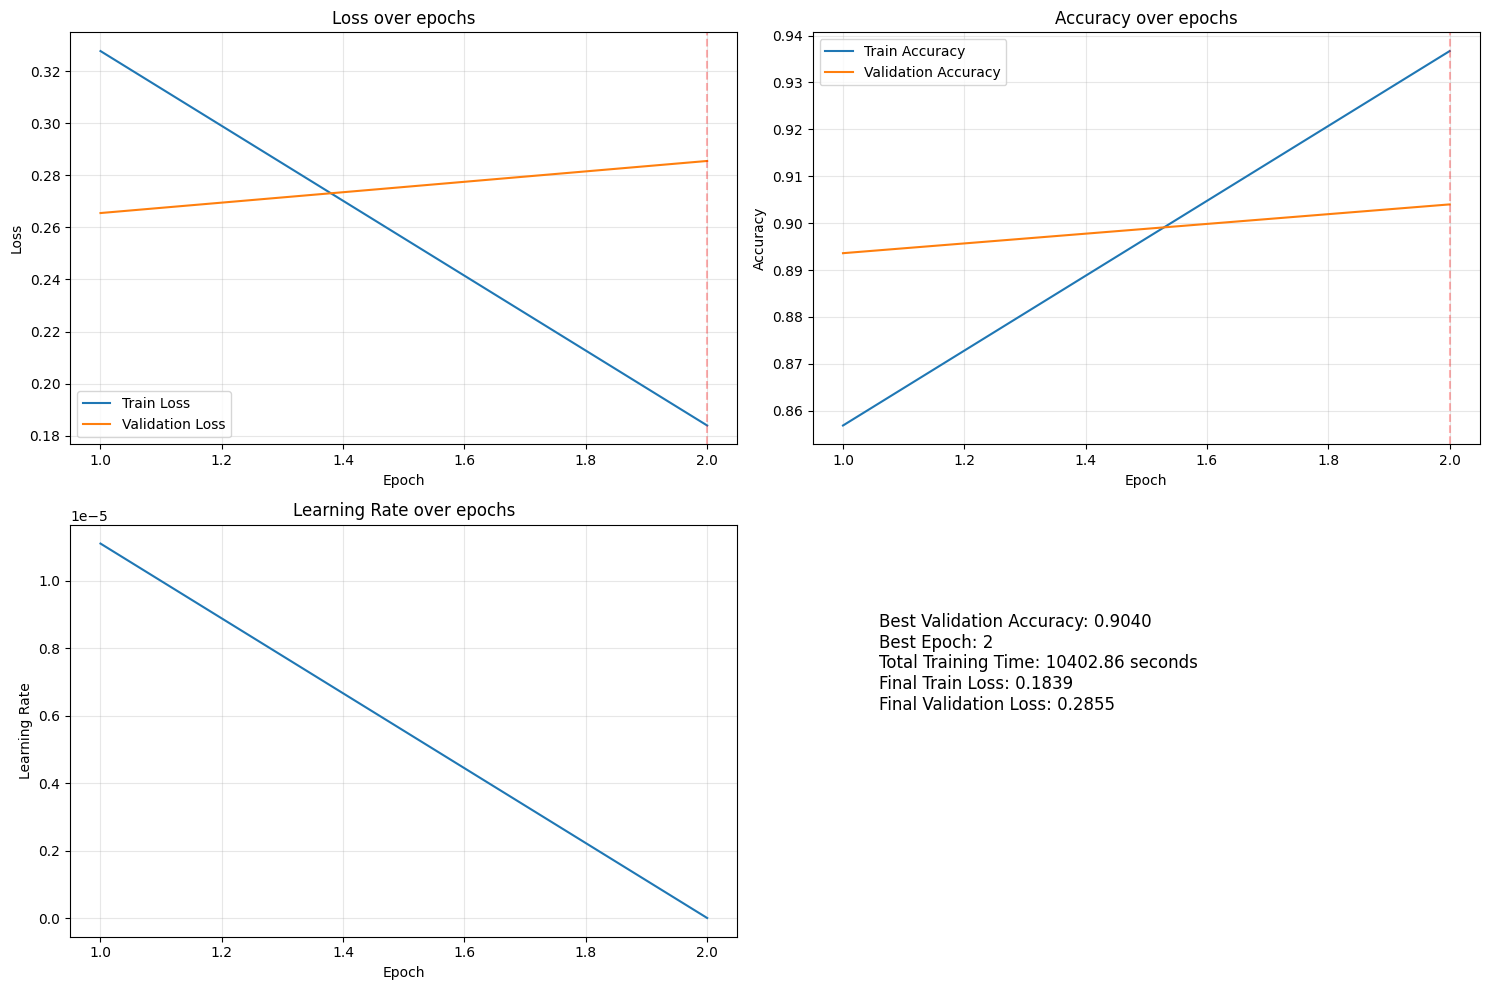

Evaluating: 100%|██████████| 313/313 [01:59<00:00,  2.62it/s]


Final Model Performance:
accuracy: 0.904
precision: 0.8970125786163522
recall: 0.9128
f1_score: 0.9048374306106265
specificity: 0.8952
true_positives: 2282
true_negatives: 2238
false_positives: 262
false_negatives: 218
inference_time: 119.64049816131592
inference_time_per_sample: 0.023928099632263184


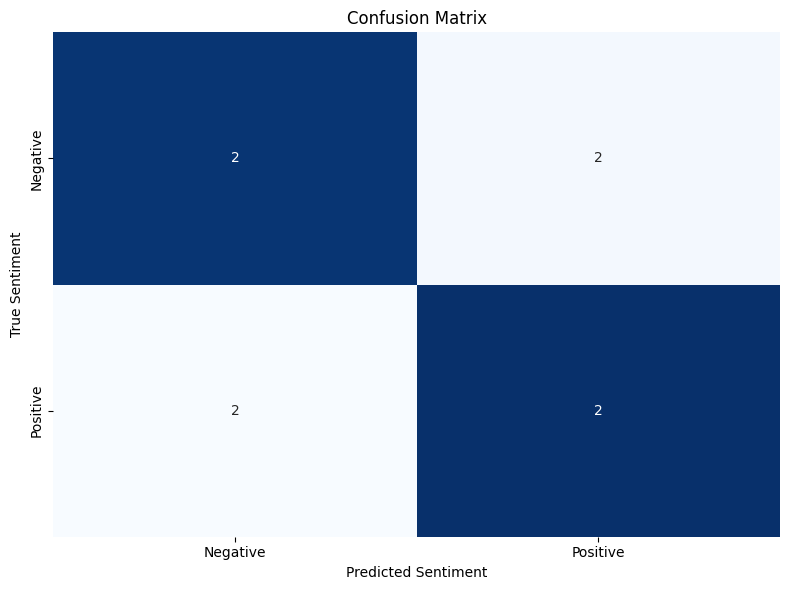

TypeError: Object of type int64 is not JSON serializable

In [ ]:
# Advanced BERT Implementation for IMDB Sentiment Analysis
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.optim import AdamW

from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer
from transformers import BertForSequenceClassification 
from transformers import get_linear_schedule_with_warmup

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import os
import time
import json
from datetime import datetime

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# IMDB Dataset class
class IMDBDataset(Dataset):
    def __init__(self, reviews, sentiments, tokenizer, max_len):
        self.reviews = reviews
        self.sentiments = sentiments
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, idx):
        review = str(self.reviews[idx])
        sentiment = self.sentiments[idx]
        
        # Clean text - minimal preprocessing for BERT
        review = self.clean_text(review)
        
        # Tokenize
        encoding = self.tokenizer(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
            'sentiment': torch.tensor(sentiment, dtype=torch.long)
        }
    
    def clean_text(self, text):
        # Remove HTML tags
        text = re.sub(r'<.*?>', ' ', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text

# Early Stopping class
class EarlyStopping:
    def __init__(self, patience=3, min_delta=0, restore_best_weights=True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_model = None
        self.best_score = None
        self.counter = 0
        self.early_stop = False
    
    def __call__(self, val_score, model):
        if self.best_score is None:
            self.best_score = val_score
            self.save_checkpoint(model)
        elif val_score < self.best_score + self.min_delta:
            self.counter += 1
            print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = val_score
            self.save_checkpoint(model)
            self.counter = 0
    
    def save_checkpoint(self, model):
        if self.restore_best_weights:
            self.best_model = model.state_dict().copy()
    
    def restore_model(self, model):
        if self.restore_best_weights and self.best_model is not None:
            model.load_state_dict(self.best_model)

# Model performance tracker
class PerformanceTracker:
    def __init__(self):
        self.train_losses = []
        self.train_accs = []
        self.val_losses = []
        self.val_accs = []
        self.lr_history = []
        self.epochs = []
        self.best_epoch = 0
        self.best_val_acc = 0
        self.training_time = 0
    
    def update(self, epoch, train_loss, train_acc, val_loss, val_acc, lr):
        self.epochs.append(epoch)
        self.train_losses.append(train_loss)
        self.train_accs.append(train_acc)
        self.val_losses.append(val_loss)
        self.val_accs.append(val_acc)
        self.lr_history.append(lr)
        
        if val_acc > self.best_val_acc:
            self.best_val_acc = val_acc
            self.best_epoch = epoch
    
    def plot_metrics(self):
        plt.figure(figsize=(15, 10))
        
        # Plot loss
        plt.subplot(2, 2, 1)
        plt.plot(self.epochs, self.train_losses, label='Train Loss')
        plt.plot(self.epochs, self.val_losses, label='Validation Loss')
        plt.axvline(x=self.best_epoch, color='r', linestyle='--', alpha=0.3)
        plt.title('Loss over epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(alpha=0.3)
        
        # Plot accuracy
        plt.subplot(2, 2, 2)
        plt.plot(self.epochs, self.train_accs, label='Train Accuracy')
        plt.plot(self.epochs, self.val_accs, label='Validation Accuracy')
        plt.axvline(x=self.best_epoch, color='r', linestyle='--', alpha=0.3)
        plt.title('Accuracy over epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(alpha=0.3)
        
        # Plot learning rate
        plt.subplot(2, 2, 3)
        plt.plot(self.epochs, self.lr_history)
        plt.title('Learning Rate over epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.grid(alpha=0.3)
        
        # Summary text
        plt.subplot(2, 2, 4)
        plt.axis('off')
        summary_text = (
            f"Best Validation Accuracy: {self.best_val_acc:.4f}\n"
            f"Best Epoch: {self.best_epoch}\n"
            f"Total Training Time: {self.training_time:.2f} seconds\n"
            f"Final Train Loss: {self.train_losses[-1]:.4f}\n"
            f"Final Validation Loss: {self.val_losses[-1]:.4f}\n"
        )
        plt.text(0.1, 0.5, summary_text, fontsize=12)
        
        plt.tight_layout()
        plt.savefig('bert_training_metrics.png')
        plt.show()
    
    def save_history(self, filepath='bert_training_history.json'):
        history = {
            'train_losses': self.train_losses,
            'train_accs': self.train_accs,
            'val_losses': self.val_losses,
            'val_accs': self.val_accs,
            'lr_history': self.lr_history,
            'epochs': self.epochs,
            'best_epoch': self.best_epoch,
            'best_val_acc': self.best_val_acc,
            'training_time': self.training_time
        }
        
        with open(filepath, 'w') as f:
            json.dump(history, f)

# Training function
def train_epoch(model, data_loader, optimizer, scheduler, device):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    progress_bar = tqdm(data_loader, desc="Training")
    for batch in progress_bar:
        # Get inputs
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        sentiments = batch['sentiment'].to(device)
        
        # Reset gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            labels=sentiments
        )
        
        loss = outputs.loss
        logits = outputs.logits
        
        # Backward pass
        loss.backward()
        
        # Clip gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        # Update weights
        optimizer.step()
        scheduler.step()
        
        # Track metrics
        total_loss += loss.item()
        
        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == sentiments)
        total_predictions += len(sentiments)
        
        # Update progress bar
        current_lr = scheduler.get_last_lr()[0]
        progress_bar.set_postfix({
            'loss': loss.item(),
            'accuracy': (correct_predictions / total_predictions).item(),
            'lr': current_lr
        })
    
    # Calculate epoch metrics
    avg_loss = total_loss / len(data_loader)
    accuracy = correct_predictions.double() / total_predictions
    
    return avg_loss, accuracy.item(), scheduler.get_last_lr()[0]

# Evaluation function
def evaluate_model(model, data_loader, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    all_predictions = []
    all_labels = []
    
    # Time tracking for inference
    start_time = time.time()
    
    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Evaluating"):
            # Get inputs
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            token_type_ids = batch['token_type_ids'].to(device)
            sentiments = batch['sentiment'].to(device)
            
            # Forward pass
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids,
                labels=sentiments
            )
            
            loss = outputs.loss
            logits = outputs.logits
            
            # Track metrics
            total_loss += loss.item()
            
            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == sentiments)
            total_predictions += len(sentiments)
            
            # Store predictions and true labels
            all_predictions.extend(preds.cpu().numpy())
            all_labels.extend(sentiments.cpu().numpy())
    
    # Calculate metrics
    avg_loss = total_loss / len(data_loader)
    accuracy = correct_predictions.double() / total_predictions
    inference_time = time.time() - start_time
    
    return (
        avg_loss, 
        accuracy.item(), 
        all_predictions, 
        all_labels, 
        inference_time
    )

# Calculate and display detailed metrics
def calculate_metrics(y_true, y_pred):
    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='binary', pos_label=1
    )
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # True/False positives/negatives
    tn, fp, fn, tp = cm.ravel()
    
    # Additional metrics
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'specificity': specificity,
        'true_positives': tp,
        'true_negatives': tn,
        'false_positives': fp,
        'false_negatives': fn
    }
    
    return metrics, cm

# Plot confusion matrix with percentages
def plot_confusion_matrix(cm, classes=['Negative', 'Positive']):
    plt.figure(figsize=(8, 6))
    
    # Calculate percentages
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Create annotation text with count and percentage
    annot = np.empty_like(cm, dtype=str)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            annot[i, j] = f"{cm[i, j]}\n({cm_norm[i, j]:.1%})"
    
    # Plot
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', cbar=False,
               xticklabels=classes, yticklabels=classes)
    
    plt.ylabel('True Sentiment')
    plt.xlabel('Predicted Sentiment')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('bert_confusion_matrix.png')
    plt.show()

# Save model function
def save_model(model, tokenizer, metrics, args, filepath='bert_model'):
    # Create directory if it doesn't exist
    os.makedirs(filepath, exist_ok=True)
    
    # Save model weights
    torch.save(model.state_dict(), f"{filepath}/bert_weights.pt")
    
    # Save tokenizer
    tokenizer.save_pretrained(filepath)
    
    # Save training args and metrics
    with open(f"{filepath}/training_info.json", 'w') as f:
        info = {
            'args': args,
            'metrics': metrics,
            'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }
        json.dump(info, f, indent=4)
    
    print(f"Model saved to {filepath}")

# Load model function
def load_model(model_path='bert_model', device=device):
    # Load tokenizer
    tokenizer = BertTokenizer.from_pretrained(model_path)
    
    # Load model configuration
    with open(f"{model_path}/training_info.json", 'r') as f:
        info = json.load(f)
        model_name = info['args']['model_name']
    
    # Initialize model
    model = BertForSequenceClassification.from_pretrained(
        model_name,
        num_labels=2
    )
    
    # Load trained weights
    model.load_state_dict(torch.load(
        f"{model_path}/bert_weights.pt", 
        map_location=device
    ))
    
    model = model.to(device)
    
    return model, tokenizer, info

# Prediction function
def predict_sentiment(text, model, tokenizer, device, max_len=128, include_probs=False):
    # Preprocess
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize
    encoding = tokenizer(
        text,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    
    # Move to device
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    token_type_ids = encoding['token_type_ids'].to(device)
    
    # Get prediction
    model.eval()
    with torch.no_grad():
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        prediction = torch.argmax(probabilities, dim=1).item()
        
    sentiment = 'positive' if prediction == 1 else 'negative'
    
    if include_probs:
        probs = probabilities.cpu().numpy()[0]
        return sentiment, probs
    else:
        return sentiment

# Main function
def main():
    # Configuration
    args = {
        'model_name': 'bert-base-uncased',
        'max_len': 128,
        'batch_size': 16,
        'epochs': 2,
        'learning_rate': 2e-5,
        'weight_decay': 0.01,
        'warmup_ratio': 0.1,
        'seed': 42,
        'early_stopping_patience': 2,
        'use_focal_loss': False,  # Optional: for imbalanced datasets
    }
    
    # Load data
    print("Loading dataset...")
    file_path = "IMDB Dataset.csv"  # Path to your dataset
    df = pd.read_csv(file_path)
    
    # Convert sentiment to binary
    df['sentiment_encoded'] = df['sentiment'].map({'positive': 1, 'negative': 0})
    
    # Check class balance
    class_counts = df['sentiment'].value_counts()
    print("Class distribution:")
    print(class_counts)
    
    # Split data
    train_df, val_df = train_test_split(
        df, 
        test_size=0.1, 
        random_state=args['seed'], 
        stratify=df['sentiment']
    )
    print(f"Training set: {train_df.shape}, Validation set: {val_df.shape}")
    
    # Load tokenizer
    tokenizer = BertTokenizer.from_pretrained(args['model_name'])
    
    # Create datasets
    print("Creating datasets...")
    train_dataset = IMDBDataset(
        train_df['review'].values,
        train_df['sentiment_encoded'].values,
        tokenizer,
        args['max_len']
    )
    
    val_dataset = IMDBDataset(
        val_df['review'].values,
        val_df['sentiment_encoded'].values,
        tokenizer,
        args['max_len']
    )
    
    # Create data loaders
    train_loader = DataLoader(
        train_dataset, 
        batch_size=args['batch_size'], 
        shuffle=True
    )
    
    val_loader = DataLoader(
        val_dataset, 
        batch_size=args['batch_size']
    )
    
    # Initialize model
    print(f"Initializing BERT model: {args['model_name']}...")
    model = BertForSequenceClassification.from_pretrained(
        args['model_name'],
        num_labels=2
    )
    
    # Move to device
    model = model.to(device)
    
    # Setup optimizer
    optimizer = AdamW(
        model.parameters(),
        lr=args['learning_rate'],
        weight_decay=args['weight_decay']
    )
    
    # Calculate total steps
    total_steps = len(train_loader) * args['epochs']
    
    # Setup scheduler
    warmup_steps = int(total_steps * args['warmup_ratio'])
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=warmup_steps,
        num_training_steps=total_steps
    )
    
    # Initialize early stopping
    early_stopping = EarlyStopping(patience=args['early_stopping_patience'])
    
    # Initialize performance tracker
    performance_tracker = PerformanceTracker()
    
    # Training loop
    print("Starting training...")
    start_time = time.time()
    
    for epoch in range(args['epochs']):
        print(f"Epoch {epoch + 1}/{args['epochs']}")
        print("-" * 30)
        
        # Train
        train_loss, train_acc, current_lr = train_epoch(
            model, train_loader, optimizer, scheduler, device
        )
        
        # Evaluate
        val_loss, val_acc, y_pred, y_true, _ = evaluate_model(
            model, val_loader, device
        )
        
        # Update trackers
        performance_tracker.update(
            epoch + 1, train_loss, train_acc, val_loss, val_acc, current_lr
        )
        
        # Print metrics
        print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")
        
        # Check early stopping
        early_stopping(val_acc, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break
    
    # Restore best model
    early_stopping.restore_model(model)
    
    # Record total training time
    performance_tracker.training_time = time.time() - start_time
    print(f"Training completed in {performance_tracker.training_time:.2f} seconds")
    
    # Plot training metrics
    performance_tracker.plot_metrics()
    performance_tracker.save_history()
    
    # Final evaluation
    _, final_val_acc, final_preds, final_labels, inference_time = evaluate_model(
        model, val_loader, device
    )
    
    # Calculate detailed metrics
    detailed_metrics, cm = calculate_metrics(final_labels, final_preds)
    detailed_metrics['inference_time'] = inference_time
    detailed_metrics['inference_time_per_sample'] = inference_time / len(final_labels)
    
    # Print detailed metrics
    print("\nFinal Model Performance:")
    for metric, value in detailed_metrics.items():
        print(f"{metric}: {value}")
    

# Run the model
if __name__ == "__main__":
    main()

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

def predict_sentiment(text, model, tokenizer, device, max_len=128):
    text = text.strip()
    
    encoding = tokenizer(
        text,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    token_type_ids = encoding.get('token_type_ids', None)
    
    model.eval()
    with torch.no_grad():
        inputs = {
            'input_ids': input_ids,
            'attention_mask': attention_mask
        }
        if token_type_ids is not None:
            inputs['token_type_ids'] = token_type_ids.to(device)
            
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        prediction = torch.argmax(probabilities, dim=1).item()
        probs = probabilities.cpu().numpy()[0]
        
    sentiment = 'positive' if prediction == 1 else 'negative'
    return sentiment, probs

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model_path = 'bert_model'  

tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',  
    num_labels=2
).to(device)

model.load_state_dict(torch.load(f"{model_path}/bert_weights.pt", map_location=device))

test_examples = [
    "This movie was fantastic! I really enjoyed it and would recommend to everyone.",
    "Terrible film, waste of time and money. One of the worst I've ever seen.",
    "The movie wasn't bad at all, I actually liked it a lot.",
    "While the acting was superb, the plot had major holes and the ending was disappointing.",
    "This film was quite interesting in how it approached the subject matter."
]

print("\nKết quả kiểm thử nhanh:")
print(f"{'Review':<50} | {'Dự đoán':<10} | {'Xác suất Pos':<10} | {'Xác suất Neg':<10}")
print("-" * 85)

for text in test_examples:
    sentiment, probs = predict_sentiment(text, model, tokenizer, device)
    short_text = text[:47] + "..." if len(text) > 50 else text
    print(f"{short_text:<50} | {sentiment:<10} | {probs[1]:.4f} | {probs[0]:.4f}")

Using device: cpu


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Kết quả kiểm thử nhanh:
Review                                             | Dự đoán    | Xác suất Pos | Xác suất Neg
-------------------------------------------------------------------------------------
This movie was fantastic! I really enjoyed it a... | positive   | 0.9977 | 0.0023
Terrible film, waste of time and money. One of ... | negative   | 0.0012 | 0.9988
The movie wasn't bad at all, I actually liked i... | positive   | 0.9901 | 0.0099
While the acting was superb, the plot had major... | negative   | 0.1055 | 0.8945
This film was quite interesting in how it appro... | positive   | 0.9734 | 0.0266


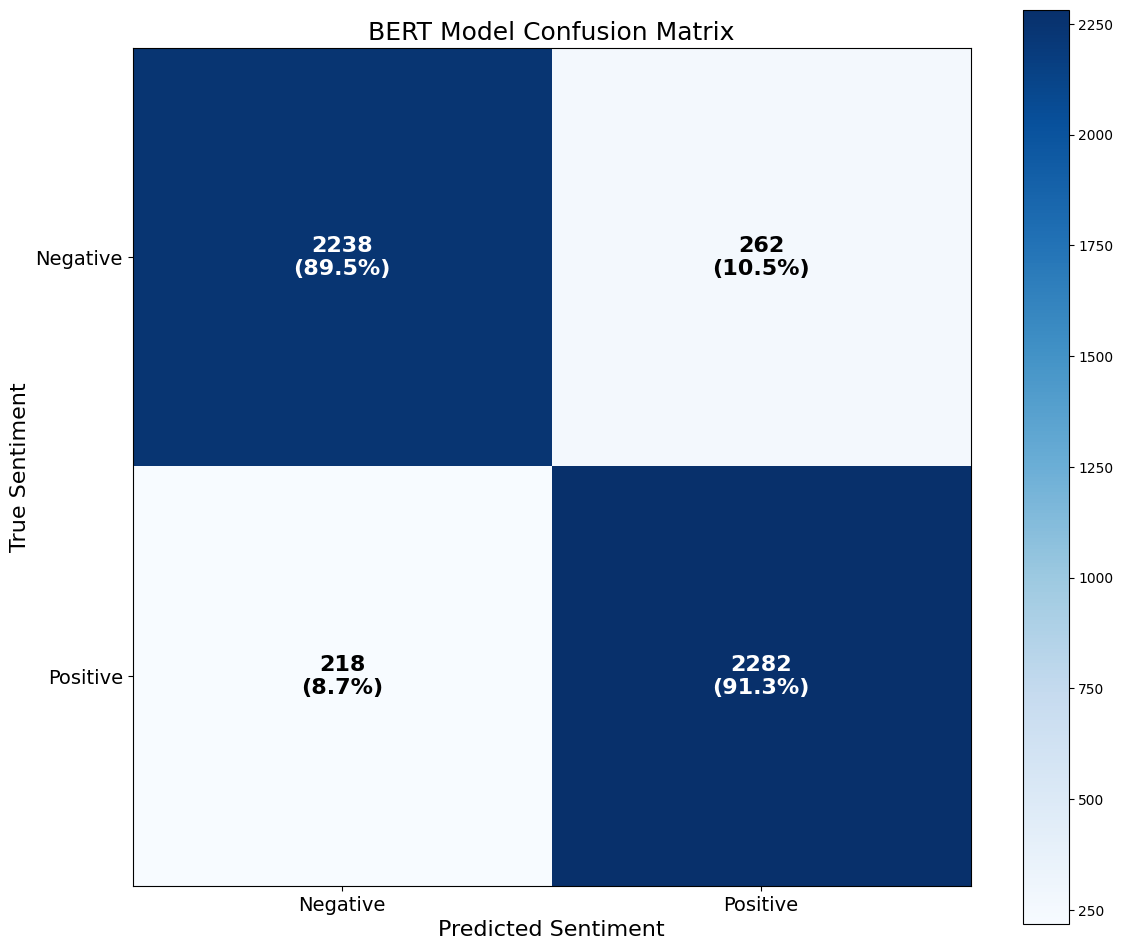

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu Confusion Matrix thực tế
true_negatives = 2238
false_positives = 262
false_negatives = 218
true_positives = 2282

# Tạo ma trận
cm = np.array([
    [true_negatives, false_positives],
    [false_negatives, true_positives]
])

# Tạo figure với kích thước lớn hơn
plt.figure(figsize=(12, 10))

# Vẽ heatmap thủ công
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Thêm tiêu đề và nhãn
plt.title('BERT Model Confusion Matrix', fontsize=18)
plt.ylabel('True Sentiment', fontsize=16)
plt.xlabel('Predicted Sentiment', fontsize=16)

# Thêm text và số liệu vào từng ô
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, fontsize=14)
plt.yticks(tick_marks, classes, fontsize=14)

# Hiển thị giá trị + phần trăm trên mỗi ô
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        # Tính phần trăm theo hàng
        pct = cm[i, j] / cm[i, :].sum() * 100
        
        # Thêm text với font size lớn
        plt.text(j, i, f"{cm[i, j]}\n({pct:.1f}%)",
                 ha="center", va="center", 
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('bert_confusion_matrix_fixed.png', dpi=300, bbox_inches='tight')
plt.show()